<a href="https://colab.research.google.com/github/shnrndk/IP-Cat-Research/blob/CDF-PDF/PDF_and_CDF_Create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from ast import literal_eval

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp  /content/drive/MyDrive/final_dataset.zip /content/

In [4]:
!unzip  final_dataset.zip

Archive:  final_dataset.zip
  inflating: cdn_final_final.csv     
  inflating: cloud_final_final.csv   
  inflating: hosting_final_final.csv  
  inflating: proxy_final_final.csv   
  inflating: vpn_final_final.csv     


In [56]:
sample_size = 30000
df = pd.read_csv('cdn_final_final.csv')
#df['vendor']= ['cdn' for x in range(df.shape[0])]
df = df.sample(n = sample_size)
df1 = pd.read_csv('cloud_final_final.csv')
#df1['vendor']= ['cloud' for x in range(df1.shape[0])]
df1 = df1.sample(n = sample_size)
df2 = pd.read_csv('hosting_final_final.csv')
#df2['vendor']= ['hosting' for x in range(df2.shape[0])]
df2 = df2.sample(n = sample_size)
df3 = pd.read_csv('vpn_final_final.csv')
#df3['vendor']= ['vpn' for x in range(df3.shape[0])]
df3 = df3.sample(n = 15000)
df4 = pd.read_csv('proxy_final_final.csv')
#df4['vendor']= ['vpn' for x in range(df3.shape[0])]
df4 = df4.sample(n = 9200)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
df = df.append([df1,df2,df3,df4],ignore_index=True)

In [58]:
df

,ip,No Of Owners,CIDR,netType,Organization,Most Recent Update,No of Who is Records,data.http.result.response.headers.server.0,data.http.result.response.status_code,data.http.result.response.headers.unknown.0.key,data.http.result.response.headers.unknown.0.value.0,data.http.result.response.headers.connection.0,data.http.result.response.headers.via.0,data.http.result.response.headers.unknown.1.key,data.http.result.response.headers.unknown.1.value.0,data.http.result.response.headers.accept_ranges.0,data.http.result.response.headers.cache_control.0,data.http.result.response.headers.retry_after.0,data.http.result.response.body,data.http.result.response.body_sha256,data.http.result.response.content_length,data.http.result.response.headers.content_type.0,data.http.result.response.headers.location.0,data.http.result.redirect_response_chain.0.status_line,data.http.result.response.headers.etag.0,data.http.result.response.headers.last_modified.0,data.http.result.response.headers.vary.0,data.http.result.response.transfer_encoding.0,data.http.result.response.headers.x_powered_by.0,data.http.result.response.headers.pragma.0,data.http.result.redirect_response_chain.0.headers.server.0,as_name,as_no,data.tls.status,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer_dn,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject_dn,data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names,vendor,Unnamed: 0_y
0,13.227.38.158,1.0,13.224.0.0/14,Direct Allocation,Amazon Technologies Inc.,1.585613e+09,1.0,CloudFront,403.0,x_amz_cf_id,yhrBya7YYmB6eUMNe6KLvxwjmxhDJmU7IA4M2xJNrtc2jQ...,keep-alive,1.1 1fdf83f6faeffdd74bddbfdba34c8703.cloudfron...,x_amz_cf_pop,MSP50-C1,NaN,NaN,NaN,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",0260c3d27120af5c0a9b4ed6ce504155158e6371a47340...,915.0,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AMAZON-02 - Amazon.com, Inc.",16509,success,['DigiCert SHA2 Secure Server CA'],['US'],['DigiCert Inc'],"C=US, O=DigiCert Inc, CN=DigiCert SHA2 Secure ...",['*.adbephotos.com'],['US'],['San Jose'],['California'],['Adobe Systems Incorporated'],"C=US, ST=California, L=San Jose, O=Adobe Syste...",['*.adbephotos.com'],cdn,NaN
1,54.192.198.16,NaN,NaN,NaN,NaN,NaN,0.0,CloudFront,403.0,x_cache,Error from cloudfront,keep-alive,1.1 b8d8693cc4ac05b6a9cebe2651a2c8b9.cloudfron...,x_amz_cf_pop,EWR53-P1,NaN,NaN,NaN,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",579e7d034aed2f39ed6efa74d727ba1d74d704bcd1aa78...,915.0,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,unknown-error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cdn,NaN
2,13.224.36.68,1.0,13.224.0.0/14,Reallocated,"Amazon.com, Inc.",1.585613e+09,1.0,CloudFront,403.0,x_amz_cf_pop,YTO50-C1,keep-alive,1.1 62ba7bce3b9fe4b9628be93f733bf2e4.cloudfron...,x_amz_cf_id,7f4WYX3xuqXWWoHKjWoqsjsHfH0Ey32vfODiLjCKbKxU6T...,NaN,NaN,NaN,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",e4711d6783ed52aca346e8b5a540b0abebf735610e3b68...,915.0,text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AMAZON-02 - Amazon.com, Inc.",16509,success,['Amazon'],['US'],['Amazon'],"C=US, O=Amazon, OU=Server CA 1B, CN=Amazon",['artistanne.cdn929.com'],NaN,NaN,NaN,NaN,CN=artistanne.cdn929.com,"['artistanne.cdn929.com', 'images.ar

In [8]:
def getgeneralCloudfront(x):
  if('(CloudFront)' in str(x)):
      return 'CloudFront'
  else:
      return x

In [9]:
def getgeneralServerNames(x):
  if('nginx' in str(x)):
      return 'nginx'
  elif('Apache' in str(x)):
      return 'Apache'
  else:
      return x

In [10]:
def getgeneralphp(x):
  if (pd.isna(x)):
    return "0"
  else:
    if('PHP' in x):
      return 'PHP'

In [11]:
def changenullaszero(x):
  if (pd.isna(x)): 
    return "0"
  else:
    return "1"

In [12]:
def getCIDRBlockLength(ipadd):
   if(pd.isna(ipadd)):
     return 0
   else:
      if(len(ipadd.split(','))==1):
        return (2**(32-int(ipadd.split('/')[1])))
      else:
        sum=0
        for i in ipadd.split(','):
          sum=sum + (2**(32-int(i.split('/')[1])))
        return sum 

In [29]:
def arrayLiteral(stringarray):
  return len(literal_eval(stringarray))

In [59]:
df['data.http.result.response.headers.via.0']  = df["data.http.result.response.headers.via.0"].apply(getgeneralCloudfront)

In [60]:
df['data.http.result.response.status_code'].fillna(-1, inplace=True)
df['data.http.result.response.headers.pragma.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.connection.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.via.0']  = df["data.http.result.response.headers.via.0"].apply(getgeneralCloudfront)
df['data.http.result.response.headers.via.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.accept_ranges.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.cache_control.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.retry_after.0'].fillna(-1, inplace=True)
df['data.http.result.response.body']  = df["data.http.result.response.body"].apply(changenullaszero)
df['data.http.result.response.body_sha256']  = df['data.http.result.response.body_sha256'].apply(changenullaszero)
df['data.http.result.response.content_length'].fillna(0, inplace=True)
df['data.http.result.response.headers.content_type.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.location.0'] = df['data.http.result.response.headers.location.0'].apply(changenullaszero)
df['data.http.result.redirect_response_chain.0.status_line'].fillna(-1, inplace=True)
df['data.http.result.response.headers.etag.0'] = df['data.http.result.response.headers.etag.0'].apply(changenullaszero)
df['data.http.result.response.headers.last_modified.0']  = df['data.http.result.response.headers.last_modified.0'].apply(changenullaszero)
df['data.http.result.response.headers.vary.0'].fillna(-1, inplace=True)
df['data.http.result.response.transfer_encoding.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.x_powered_by.0'].fillna(-1, inplace=True)
df['data.http.result.redirect_response_chain.0.headers.server.0'].fillna(-1, inplace=True)
df = df.drop(['data.http.result.redirect_response_chain.0.headers.server.0'],axis=1)
df['data.http.result.response.headers.server.0']  = df['data.http.result.response.headers.server.0'].apply(getgeneralServerNames)
df['data.http.result.response.headers.server.0'].fillna(-1, inplace=True)

In [61]:
df['data.http.result.response.headers.server.0'] = le.fit_transform(df['data.http.result.response.headers.server.0'].astype(str))
df['data.http.result.response.status_code'] = le.fit_transform(df['data.http.result.response.status_code'].astype(str))
df['data.http.result.response.headers.connection.0'] = le.fit_transform(df['data.http.result.response.headers.connection.0'].astype(str))
df['data.http.result.response.headers.via.0'] = le.fit_transform(df['data.http.result.response.headers.via.0'].astype(str))
df['data.http.result.response.headers.accept_ranges.0'] = le.fit_transform(df['data.http.result.response.headers.accept_ranges.0'].astype(str))
df['data.http.result.response.headers.cache_control.0'] = le.fit_transform(df['data.http.result.response.headers.cache_control.0'].astype(str))
df['data.http.result.response.headers.retry_after.0'] = le.fit_transform(df['data.http.result.response.headers.retry_after.0'].astype(str))
df['data.http.result.response.body'] = le.fit_transform(df['data.http.result.response.body'].astype(str))
df['data.http.result.response.body_sha256'] = le.fit_transform(df['data.http.result.response.body_sha256'].astype(str))
df['data.http.result.response.headers.content_type.0'] = le.fit_transform(df['data.http.result.response.headers.content_type.0'].astype(str))

df['data.http.result.response.headers.location.0'] = le.fit_transform(df['data.http.result.response.headers.location.0'].astype(str))
df['data.http.result.redirect_response_chain.0.status_line'] = le.fit_transform(df['data.http.result.redirect_response_chain.0.status_line'].astype(str))
df['data.http.result.response.headers.etag.0'] = le.fit_transform(df['data.http.result.response.headers.etag.0'].astype(str))
df['data.http.result.response.headers.last_modified.0'] = le.fit_transform(df['data.http.result.response.headers.last_modified.0'].astype(str))
df['data.http.result.response.headers.vary.0'] = le.fit_transform(df['data.http.result.response.headers.vary.0'].astype(str))
df['data.http.result.response.transfer_encoding.0'] = le.fit_transform(df['data.http.result.response.transfer_encoding.0'].astype(str))

df['data.http.result.response.headers.x_powered_by.0'] = le.fit_transform(df['data.http.result.response.headers.x_powered_by.0'].astype(str))
df['data.http.result.response.headers.pragma.0'] = le.fit_transform(df['data.http.result.response.headers.pragma.0'].astype(str))
df['as_name'] = le.fit_transform(df['as_name'].astype(str))

df['as_no'] = le.fit_transform(df['as_no'].astype(str))
df['vendor'] = le.fit_transform(df['vendor'].astype(str))



In [62]:
df = df.drop(['data.http.result.response.headers.unknown.0.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.value.0'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.value.0'],axis=1)

In [49]:
df['No of Who is Records'].count()

30000

In [66]:
df = df.dropna(subset=['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'])

In [68]:
df["CNAME Count"] = df["data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names"].apply(arrayLiteral)

In [67]:
df["data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names"].count()

80655

In [70]:
df["CNAME Count"]

0          1
2          2
3          2
6          2
7          2
          ..
114059     2
114069     1
114094     1
114139    11
114198     1
Name: CNAME Count, Length: 80655, dtype: int64

In [ ]:
df['CIDR']

3         151.101.0.0/16
5           13.35.0.0/16
7          54.224.0.0/12
8           52.84.0.0/15
9          13.249.0.0/16
               ...      
114189       103.0.0.0/8
114192       112.0.0.0/8
114195       116.0.0.0/8
114196     98.162.0.0/17
114198        46.0.0.0/8
Name: CIDR, Length: 77040, dtype: object

In [ ]:
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'][4]

"['cloudfront.net', '*.cloudfront.net']"

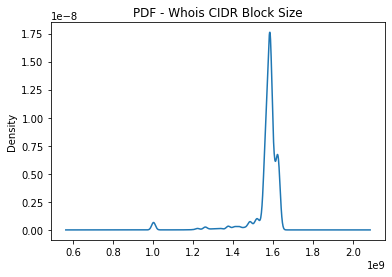

In [ ]:
df['Most Recent Update'].plot.kde(title='PDF - Whois CIDR Block Size')

In [ ]:
df.columns

Index(['ip', 'No Of Owners', 'CIDR', 'netType', 'Organization',
       'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server.0',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.connection.0',
       'data.http.result.response.headers.via.0',
       'data.http.result.response.headers.accept_ranges.0',
       'data.http.result.response.headers.cache_control.0',
       'data.http.result.response.headers.retry_after.0',
       'data.http.result.response.body',
       'data.http.result.response.body_sha256',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type.0',
       'data.http.result.response.headers.location.0',
       'data.http.result.redirect_response_chain.0.status_line',
       'data.http.result.response.headers.etag.0',
       'data.http.result.response.headers.last_modified.0',
       'data.http.result.response.headers.vary.0',
       'data.htt

In [ ]:
cdf = np.cumsum(pdf)

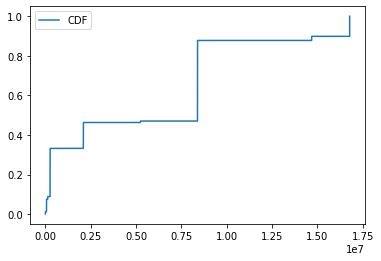

In [ ]:
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

In [54]:
len(df['CNAME Count'].values)

18860

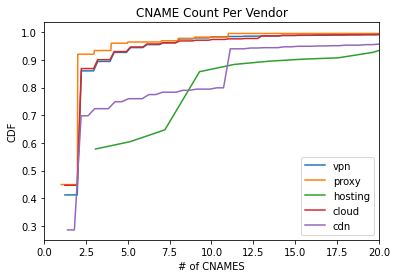

In [78]:
count, bins_count  = np.histogram(df[df["vendor"] == 4]['CNAME Count'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[4])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 3]['CNAME Count'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[3])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 2]['CNAME Count'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[2])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 1]['CNAME Count'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[1])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 0]['CNAME Count'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[0])
plt.legend()
plt.title('CNAME Count Per Vendor')
plt.ylabel('CDF')
plt.xlabel('# of CNAMES')
plt.xlim(0,20)
plt.savefig('CNAME Count Per Vendor.png')

No handles with labels found to put in legend.


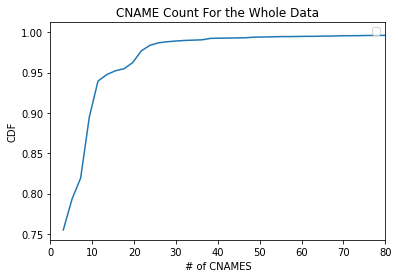

In [83]:
count, bins_count  = np.histogram(df['CNAME Count'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf)
plt.legend()
plt.title('CNAME Count For the Whole Data')
plt.ylabel('CDF')
plt.xlabel('# of CNAMES')
plt.xlim(0,80)
plt.savefig('Cname Count Whole.png')

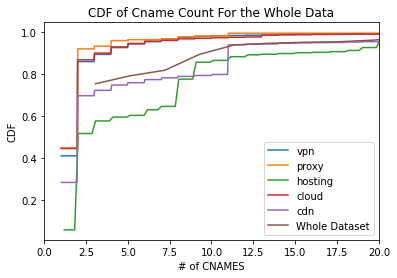

In [89]:
count, bins_count  = np.histogram(df[df["vendor"] == 4]['CNAME Count'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[4])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 3]['CNAME Count'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[3])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 2]['CNAME Count'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[2])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 1]['CNAME Count'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[1])
plt.legend()

count, bins_count  = np.histogram(df[df["vendor"] == 0]['CNAME Count'].values, bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label=le.classes_[0])
plt.legend()
plt.title('CDF of No of Whois Records Per Vendor')
plt.ylabel('CDF')
plt.xlabel('# of Whois Records')

count, bins_count  = np.histogram(df['CNAME Count'].values, bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label = "Whole Dataset")
plt.legend()
plt.title('CDF of Cname Count For the Whole Data')
plt.ylabel('CDF')
plt.xlabel('# of CNAMES')
plt.xlim(0,20)
plt.savefig('CName Count Merged.png')

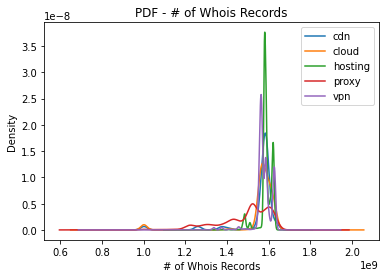

In [ ]:
df[df["vendor"] == 0]['Most Recent Update'].plot.kde(title='PDF - Whois CIDR Block Size',label=le.classes_[0])
df[df["vendor"] == 1]['Most Recent Update'].plot.kde(title='PDF - Whois CIDR Block Size',label=le.classes_[1])
df[df["vendor"] == 2]['Most Recent Update'].plot.kde(title='PDF - Whois CIDR Block Size ',label=le.classes_[2])
df[df["vendor"] == 3]['Most Recent Update'].plot.kde(title='PDF - Whois CIDR Block Size',label=le.classes_[3])
df[df["vendor"] == 4]['Most Recent Update'].plot.kde(title='PDF - # of Whois Records',label=le.classes_[4])
plt.legend(le.classes_)
plt.xlabel('# of Whois Records')
plt.savefig('No Of Whois Records PDF.png')

In [ ]:
print(le.classes_[0])
df[df["vendor"] == 0]['Most Recent Update'].describe()

cdn


count    1.575200e+04
mean     1.552620e+09
std      1.128359e+08
min      1.001151e+09
25%      1.585613e+09
50%      1.585613e+09
75%      1.585613e+09
max      1.632096e+09
Name: Most Recent Update, dtype: float64

In [ ]:
print(le.classes_[1])
df[df["vendor"] == 1]['Most Recent Update'].describe()

cloud


count    2.353300e+04
mean     1.562142e+09
std      1.140714e+08
min      1.001030e+09
25%      1.564704e+09
50%      1.585613e+09
75%      1.602841e+09
max      1.705277e+09
Name: Most Recent Update, dtype: float64

In [ ]:
print(le.classes_[2])
df[df["vendor"] == 2]['Most Recent Update'].describe()

hosting


count    2.699100e+04
mean     1.586451e+09
std      3.419309e+07
min      1.274705e+09
25%      1.580316e+09
50%      1.588118e+09
75%      1.609510e+09
max      1.632355e+09
Name: Most Recent Update, dtype: float64

In [ ]:
print(le.classes_[3])
df[df["vendor"] == 3]['Most Recent Update'].describe()

proxy


count    7.096000e+03
mean     1.486429e+09
std      1.251826e+08
min      9.428112e+08
25%      1.430698e+09
50%      1.521072e+09
75%      1.585729e+09
max      1.638518e+09
Name: Most Recent Update, dtype: float64

In [ ]:
print(le.classes_[4])
df[df["vendor"] == 4]['Most Recent Update'].describe()

vpn


count    1.216100e+04
mean     1.577256e+09
std      4.142987e+07
min      1.001151e+09
25%      1.564013e+09
50%      1.566822e+09
75%      1.595430e+09
max      1.631492e+09
Name: Most Recent Update, dtype: float64

In [ ]:
print("Whole")
df['Most Recent Update'].describe()

Whole


count    8.553300e+04
mean     1.563927e+09
std      9.244211e+07
min      9.428112e+08
25%      1.566822e+09
50%      1.585613e+09
75%      1.599696e+09
max      1.705277e+09
Name: Most Recent Update, dtype: float64